<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Tutorials/W4_S1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**
One of the statistical method that can be useful in many data analysis settings is regression. 

Regression problems can be conceptualize with the following simple scenario: Assuming you have some measurements of how one physical property relates to another physical property in real life.

Reference: 
1. Machine Learning Foundations and Practice (CS345_Colorado State University)

Let's create some fake data!

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [2]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(50)
y = 2 * x - 5 + rng.standard_normal(50)*2.5

Just now we created 50 random data points in one physical dimension (X), we assumed that the measurements in the X dimension relates to another dimension (Y) with the following equation:
$y = 2x-5$

To mimic real observations, we add some random uncertainties so that these "observations" would not exactly follow the equation.

Now let's see how the fake data looks like!

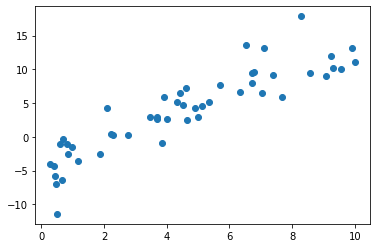

In [3]:
plt.scatter(x,y)
plt.show()

If we have a data that only has information for the X coordinate, and we assume the underlying relationship between Y and X still holds, we can get plug in the observed X into the equation to get the corresponding Y value!

But how do you find $y = 2x-5$ just from the data? This is where **regression** comes in. 

In one dimension, linear regression takes the following form:

$$
\large
y =  wx + b
$$

$w$ and $b$ are the **model parameters** we would like to optimize based on the data we currently have. As soon as we get the equation, we can use it to make predictions on new data (e.g., the examples we just discussed)

Fortunately, we do not need to code the model optimization and parameters finding procedure from scratch! We can just use the pre-packaged sklearn [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) functions instead. 

Let's try it out!

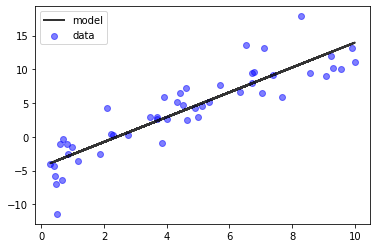

In [4]:
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
# (Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.)
linreg = LinearRegression()
linreg.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred = linreg.predict(x.reshape(-1,1))

# plot the reslts
plt.scatter(x, y,  color='blue', alpha=0.5, label = 'data')
plt.plot(x, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
plt.legend(loc="best")
plt.show()

This is what the optimized parameters look like. The values are not exactly what we defined originally, but it's in the same ballpark.

In [5]:
#print(f"Model Prediction:{linreg.predict(np.asarray(2).reshape(1,-1))}")
#print(f"Real:{2*2-5}")
print(f"w:{np.round(float(linreg.coef_),decimals=2)},b:{np.round(float(linreg.intercept_),decimals=2)}")

w:1.84,b:-4.44


One way to get a more accurate model is to obtain more data. Observe the model parameters are way more accurate when we use 10000 data points to train the regression model.

In [6]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(10000)
y = 2 * x - 5 + rng.standard_normal(10000)*2.5
linregN = LinearRegression()
linregN.fit(x.reshape(-1,1), y.reshape(-1,1))
print(f"w:{np.round(float(linregN.coef_),decimals=2)},b:{np.round(float(linregN.intercept_),decimals=2)}")

w:2.0,b:-4.97


How are the model parameters derived? In the scikit-learn package, the least-squared method is used.

The parameters $(w,b)$ are chosen as to minimize the sum-squared error:
$$
J( w,b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$

where $y_i$ are the known labels and $\hat{y}_i = w x_i + b$ are the predicted labels. So the function actually repeats the model prediction multiple times with different `w` and `b`, and ultimately settles on the combination that minimizes the `J`.

### **Exercise: Multivariate Linear Regression**
What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

**Q1: Use pandas to import the advertising dataset**

In [ ]:
import pandas

# Q1a: Use pandas to import the dataset
__ = pandas.__(_,_)
# Q1b: Display the first rows of the data with pandas
__.__()

In [12]:
#@title Answers
# Import a dataset of advertising spends
advert = pandas.read_csv('myadvertising.csv', index_col=0)

# Display the first five rows of the data
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"**

This model will basically tell us how sales would change if we put resources to advertise products in three different medias.

In [12]:
from sklearn.____ import ____

# Construct Input / Output matrices
Xall = __[[_,_,_]].values
y = _[].values
linreg = ___
linreg.__(_,_)

In [13]:
#@title Answer
from sklearn.linear_model import LinearRegression

Xall = advert[['TV', 'Radio', 'Newspaper']].values
y    = advert['Sales'].values

linreg = LinearRegression(); linreg.fit(Xall, y)

LinearRegression()

**Q3: Print out the linear equation coefficients and intercept**

In [ ]:
cfs = [round(x,_) for x in linreg.____]
print(f'Coefficients {cfs}, Intercept {linreg.____:5.2f}' )

In [14]:
#@title Answer
cfs = [round(x,4) for x in linreg.coef_]
print(f'Coefficients {cfs}, Intercept {linreg.intercept_:5.2f}' )

Coefficients [0.0458, 0.1885, -0.001], Intercept  2.94
